In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from sklearn.isotonic import IsotonicRegression

In [2]:
df = pd.read_table('./adam_vgg8/log.txt')

In [3]:
df.head()

2019-04-06 11:38:10.604140
0  {'lr': 0.0001, 'reg': 1e-05}-->Performance: {'...
1                         2019-04-06 11:44:57.965569
2  {'lr': 0.0001083365594989642, 'reg': 1.0009629...
3                         2019-04-06 11:50:49.332673
4  {'lr': 0.00012017018057979315, 'reg': 1.011433...

In [4]:
data = np.asarray(df)

In [5]:
data[0]

array(["{'lr': 0.0001, 'reg': 1e-05}-->Performance: {'val_loss': [1.282779377937317, 1.2762713575363158, 1.2972485914230347], 'val_acc': [0.5428999979496002, 0.5502999980449677, 0.5340000009536743]}"],
      dtype=object)

In [6]:
data[2]

array(["{'lr': 0.0001083365594989642, 'reg': 1.0009629017088731e-05}-->Performance: {'val_loss': [1.1425843353271485, 1.1255954670906068, 1.1459699244499206], 'val_acc': [0.5925000007152558, 0.6018999998569489, 0.5962999968528747]}"],
      dtype=object)

In [7]:
line = 0

ind_lr = data[line][0].find('\'lr\': ')
print('Index of String lr: %i' % ind_lr)
len_lr = len('\'lr\': ')
print('Length of String lr: %i' % len_lr)
ind_reg = data[line][0].find(', \'reg\': ')
print('Index of String reg: %i' % ind_reg)
len_reg = len(', \'reg\': ')
print('Length of String reg: %i' % len_reg)
ind_arrow = data[line][0].find('}-->')
print('Index of String arrow: %i' % ind_arrow)
ind_acc = data[line][0].find('\'val_acc\': [')
print('Index of String acc: %i' % ind_acc)
len_acc = len('\'val_acc\': [')
print('Length of String acc: %i' % len_acc)
ind_fin = data[line][0].find(']}')
print('Index of String end: %i' % ind_fin)

Index of String lr: 1
Length of String lr: 6
Index of String reg: 13
Length of String reg: 9
Index of String arrow: 27
Index of String acc: 118
Length of String acc: 12
Index of String end: 188


In [8]:
print(data[line][0][len_lr + ind_lr : ind_reg])
print(data[line][0][len_reg + ind_reg : ind_arrow])
print(data[line][0][len_acc + ind_acc : ind_fin])
acc_l = data[line][0][len_acc + ind_acc : ind_fin].split(",")
print(max(float(acc_l[0]), float(acc_l[1]), float(acc_l[2])))

0.0001
1e-05
0.5428999979496002, 0.5502999980449677, 0.5340000009536743
0.5502999980449677


In [9]:
len(data)

79

In [25]:
def plot_acc(dataframe, color):
    data = np.array(dataframe)
    lr_list = []
    reg_list = []
    acc_list = []
    for i in range(len(data)):
        if i % 2 == 0:
            ind_lr = data[i][0].find('\'lr\': ')
            len_lr = len('\'lr\': ')
            ind_reg = data[i][0].find(', \'reg\': ')
            len_reg = len(', \'reg\': ')
            ind_arrow = data[i][0].find('}-->')
            lr_list = np.append(lr_list, (float(data[i][0][len_lr + ind_lr : ind_reg])))
            reg_list = np.append(reg_list, (float(data[i][0][len_reg + ind_reg : ind_arrow])))
            ind_acc = data[i][0].find('\'val_acc\': [')
            len_acc = len('\'val_acc\': [')
            ind_fin = data[i][0].find(']}')
            acc = data[i][0][len_acc + ind_acc : ind_fin].split(",")
            acc_list = np.append(acc_list, np.mean([float(acc[0]), float(acc[1]), float(acc[2])]))

    X = np.array([(i + 1) for i in range(40)])

    Xnew = np.linspace(X.min(),X.max(),300)
    spl = make_interp_spline(X, acc_list, k=3)
    acc_smooth = spl(Xnew)


    #ir = IsotonicRegression()
    #acc_smooth = ir.fit_transform(Xnew, acc_smooth)
    print(lr_list[np.argmax(acc_list)])
    return Xnew, acc_smooth

0.06145769275905212
0.058831426278677976
0.0008483819545067209
0.004336567147366186
0.038429410346335374
0.03390492529227013
0.00029232902142303156
0.0012386200804803756


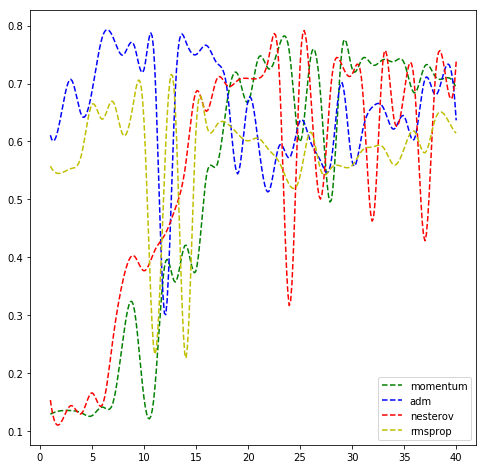

In [26]:
X_momentum_vgg11, y_momentum_vgg11 = plot_acc(pd.read_table('./momentum_vgg11/log.txt'), 'g-')
X_momentum_vgg8, y_momentum_vgg8 = plot_acc(pd.read_table('./momentum_vgg8/log.txt'), 'b-')
X_adam_vgg11, y_adam_vgg11 = plot_acc(pd.read_table('./adam_vgg11/log.txt'), 'g-')
X_adam_vgg8, y_adam_vgg8 = plot_acc(pd.read_table('./adam_vgg8/log.txt'), 'b-')
X_nesterov_vgg11, y_nesterov_vgg11 = plot_acc(pd.read_table('./nesterov_vgg11/log.txt'), 'g-')
X_nesterov_vgg8, y_nesterov_vgg8 = plot_acc(pd.read_table('./nesterov_vgg8/log.txt'), 'b-')
X_rmsprop_vgg11, y_rmsprop_vgg11 = plot_acc(pd.read_table('./rmsprop_vgg11/log.txt'), 'g-')
X_rmsprop_vgg8, y_rmsprop_vgg8 = plot_acc(pd.read_table('./rmsprop_vgg8/log.txt'), 'b-')

plt.figure(figsize = (8, 8))
plt.plot(X_momentum_vgg11, y_momentum_vgg11, 'g--', markersize=12, label = 'momentum')
plt.plot(X_adam_vgg11, y_adam_vgg11, 'b--', markersize=12, label = 'adm')
plt.plot(X_nesterov_vgg11, y_nesterov_vgg11, 'r--', markersize=12, label = 'nesterov')
plt.plot(X_rmsprop_vgg11, y_rmsprop_vgg11, 'y--', markersize=12, label = 'rmsprop')
plt.legend(loc='lower right')

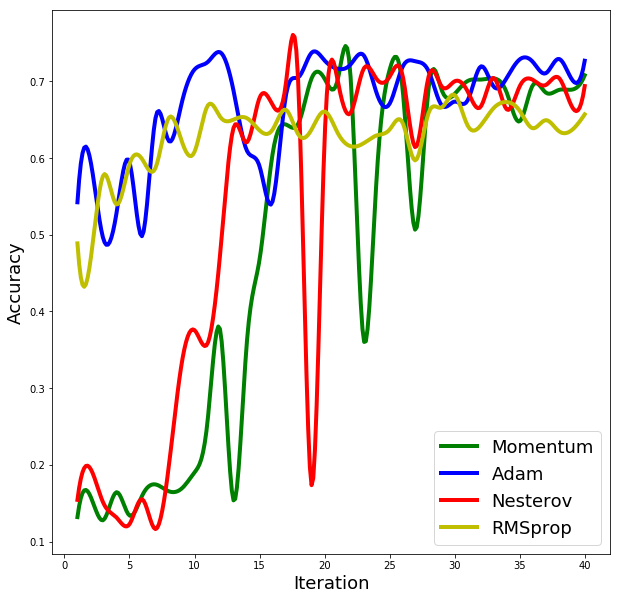

In [29]:
plt.figure(figsize = (10, 10))
#plt.title("Performance vs. Iteration by VGG8")
plt.xlabel('Iteration', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.plot(X_momentum_vgg8, y_momentum_vgg8, 'g-', linewidth=4, label = 'Momentum')
plt.plot(X_adam_vgg8, y_adam_vgg8, 'b-', linewidth=4, label = 'Adam')
plt.plot(X_nesterov_vgg8, y_nesterov_vgg8, 'r-', linewidth=4, label = 'Nesterov')
plt.plot(X_rmsprop_vgg8, y_rmsprop_vgg8, 'y-', linewidth=4, label = 'RMSprop')
plt.legend(loc='lower right', fontsize = 18)

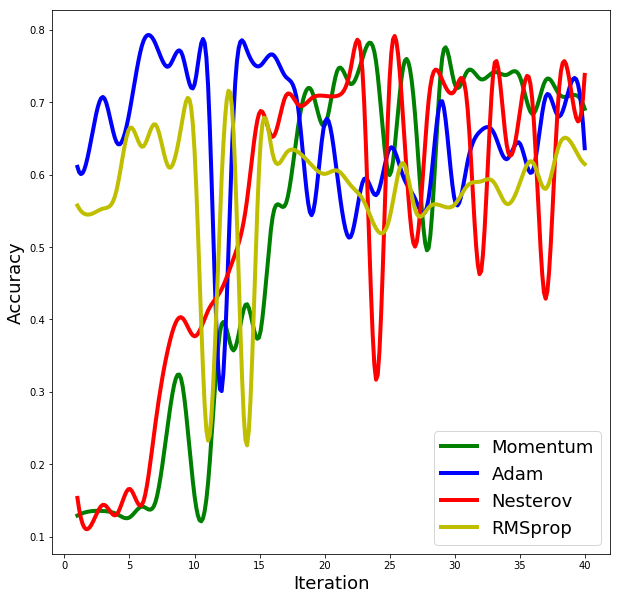

In [30]:
plt.figure(figsize = (10, 10))
#plt.title("Performance vs. Iteration by VGG11")
plt.xlabel('Iteration', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.plot(X_momentum_vgg11, y_momentum_vgg11, 'g-', linewidth=4, label = 'Momentum')
plt.plot(X_adam_vgg11, y_adam_vgg11, 'b-', linewidth=4, label = 'Adam')
plt.plot(X_nesterov_vgg11, y_nesterov_vgg11, 'r-', linewidth=4, label = 'Nesterov')
plt.plot(X_rmsprop_vgg11, y_rmsprop_vgg11, 'y-', linewidth=4, label = 'RMSprop')
plt.legend(loc='lower right', fontsize = 18)